In [1]:
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier

# function to split our data
from sklearn.model_selection import train_test_split

# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal (without the quotes).
import graphviz

# Sklearn Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Use inline so our visualizations display in notebook
%matplotlib inline


In [2]:
df = pd.read_csv('dataset/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Columns Descriptions
 * **Time**:  Number of seconds elapsed between this transaction and the first transaction in the dataseNumber of seconds elapsed between this transaction and the first transaction in the datase
 * **V1 - V28**: Contains numerical inputs obtained from Principal Component Analysis (PCA) transformation. PCA explanation *https://www.youtube.com/watch?v=FgakZw6K1QQ*
 * **Amount**: The amount of the transaction.
 * **Class**: Whether transaction is fraudulent(1) or genuine(0). 

## EDA

In [4]:
# No null values dataset is clean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

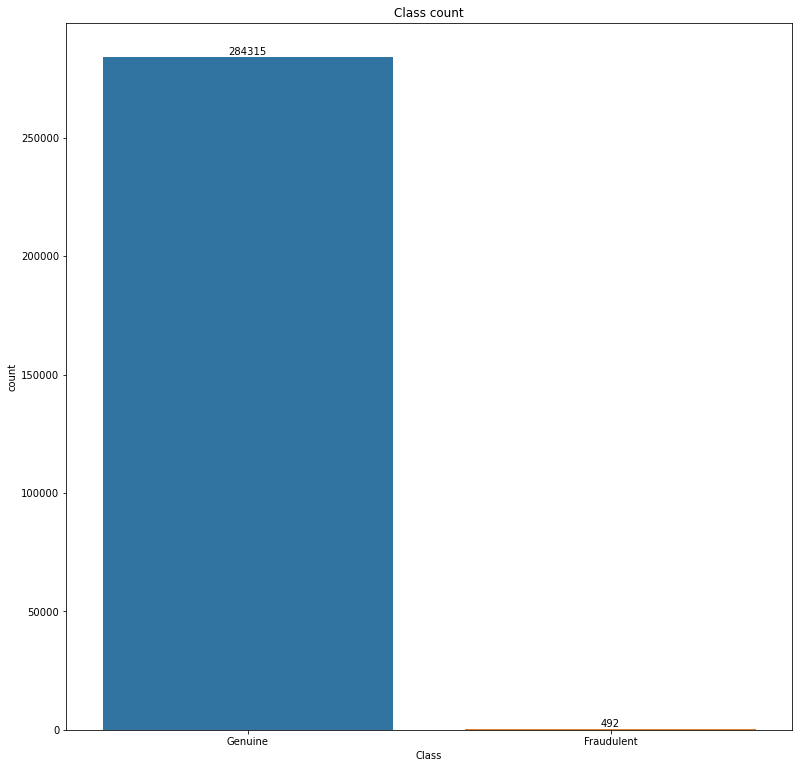

In [5]:
fig, ax = plt.subplots(figsize=(13, 13))
 
# drawing the plot
sns.countplot(x = df['Class'])

plt.title("Class count")

# Tick labels
plt.xticks([0,1],["Genuine", "Fraudulent"])

# Amounts on top of bars
ax = plt.gca()
plt.bar_label(ax.containers[0])


plt.show()

In [6]:
genuine = df[df["Class"] == 0]
fraudulent = df[df["Class"] == 1]

In [7]:
genuine["Amount"].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
fraudulent["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Out of *280,000+* transactions **492** are fraudulent.

C:\Users\xzero\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Genuine')

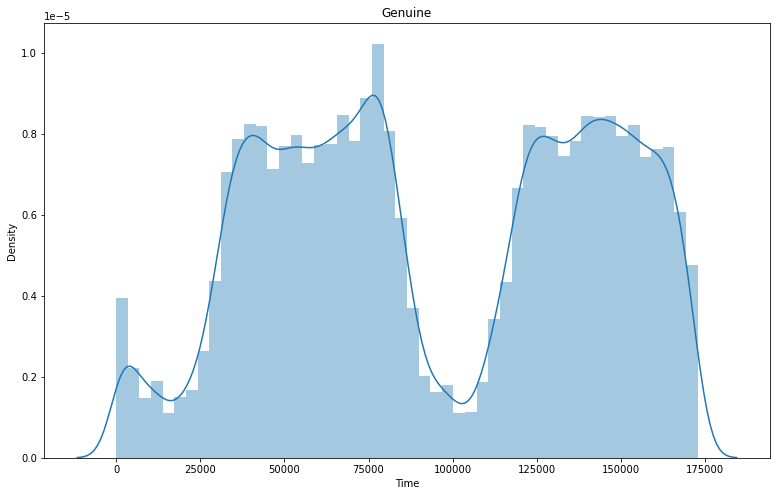

In [23]:
sns.distplot(genuine["Time"])
plt.title("Genuine")

C:\Users\xzero\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fraudulent')

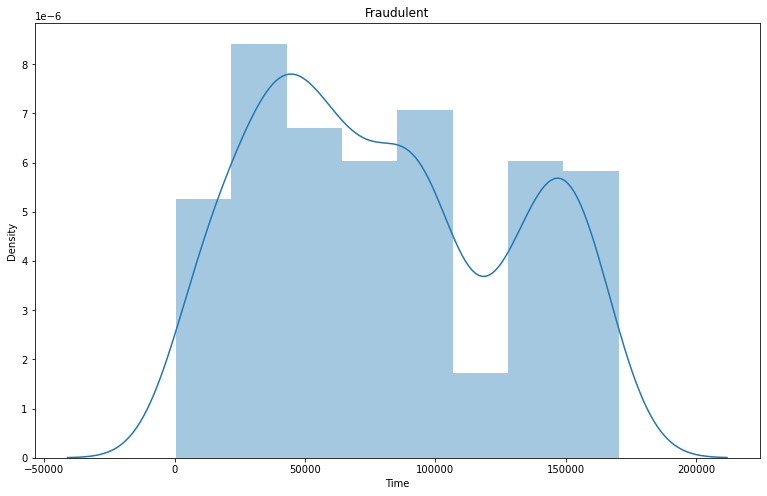

In [24]:
sns.distplot(fraudulent["Time"])
plt.title("Fraudulent")

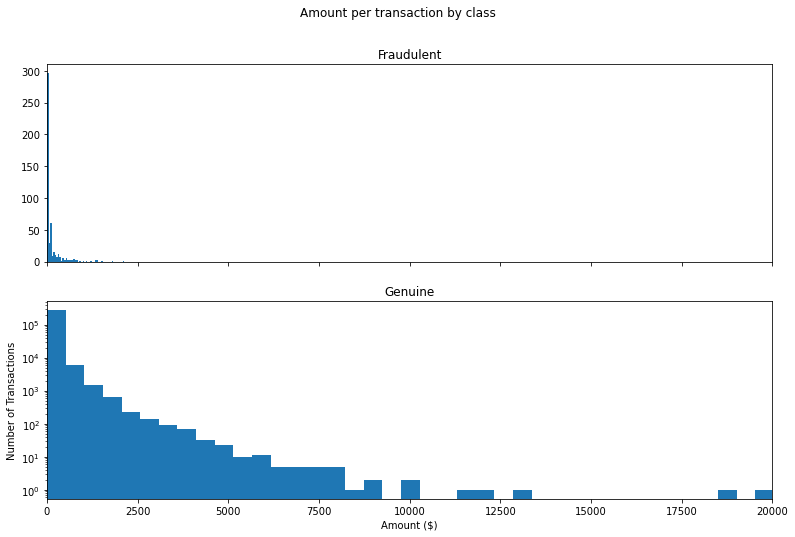

In [11]:
rcParams['figure.figsize'] = 13, 8
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraudulent.Amount, bins = bins)
ax1.set_title('Fraudulent')
ax2.hist(genuine.Amount, bins = bins)
ax2.set_title('Genuine')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

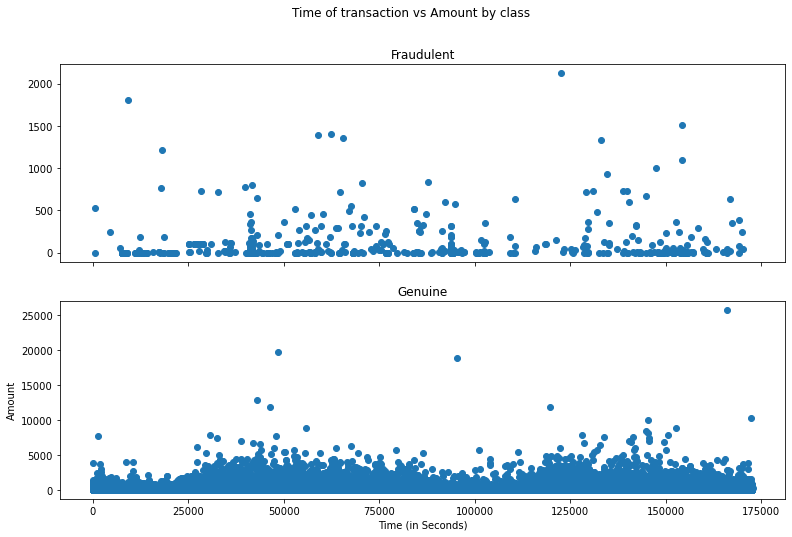

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraudulent.Time, fraudulent.Amount)
ax1.set_title('Fraudulent')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## Anomaly Detection

In [13]:
X = df.loc[:, "Time":"Amount"]
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
# First using Decision Trees
model = DecisionTreeClassifier(max_depth=2)

In [15]:
# Fiting our model with our training data. 
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [16]:
# Making predictions
y_pred = model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print("F1 Score: %f" % f1)

Accuracy Score: 0.999192
Precision Score: 0.788889
Recall Score: 0.724490
F1 Score: 0.755319


### Scores explaination
Accuracy Score is really high becuase our data is really unbalanced all the model is doing
is mostly guessing the each example is genuine 0.1727 % of data is fraudulent. Should focus on the combination of both recall and precision score so f1 score should be our focus.
0.1727 % of data is fraudulent 

In [18]:
(len(fraudulent) / (len(fraudulent) + len(genuine))) * 100

0.1727485630620034

In [19]:
model = RandomForestClassifier()

In [20]:
# Fiting our model with our training data. 
model.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
# Making predictions
y_pred = model.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_test, y_pred)
print("F1 Score: %f" % f1)

Accuracy Score: 0.999561
Precision Score: 0.974026
Recall Score: 0.765306
F1 Score: 0.857143
